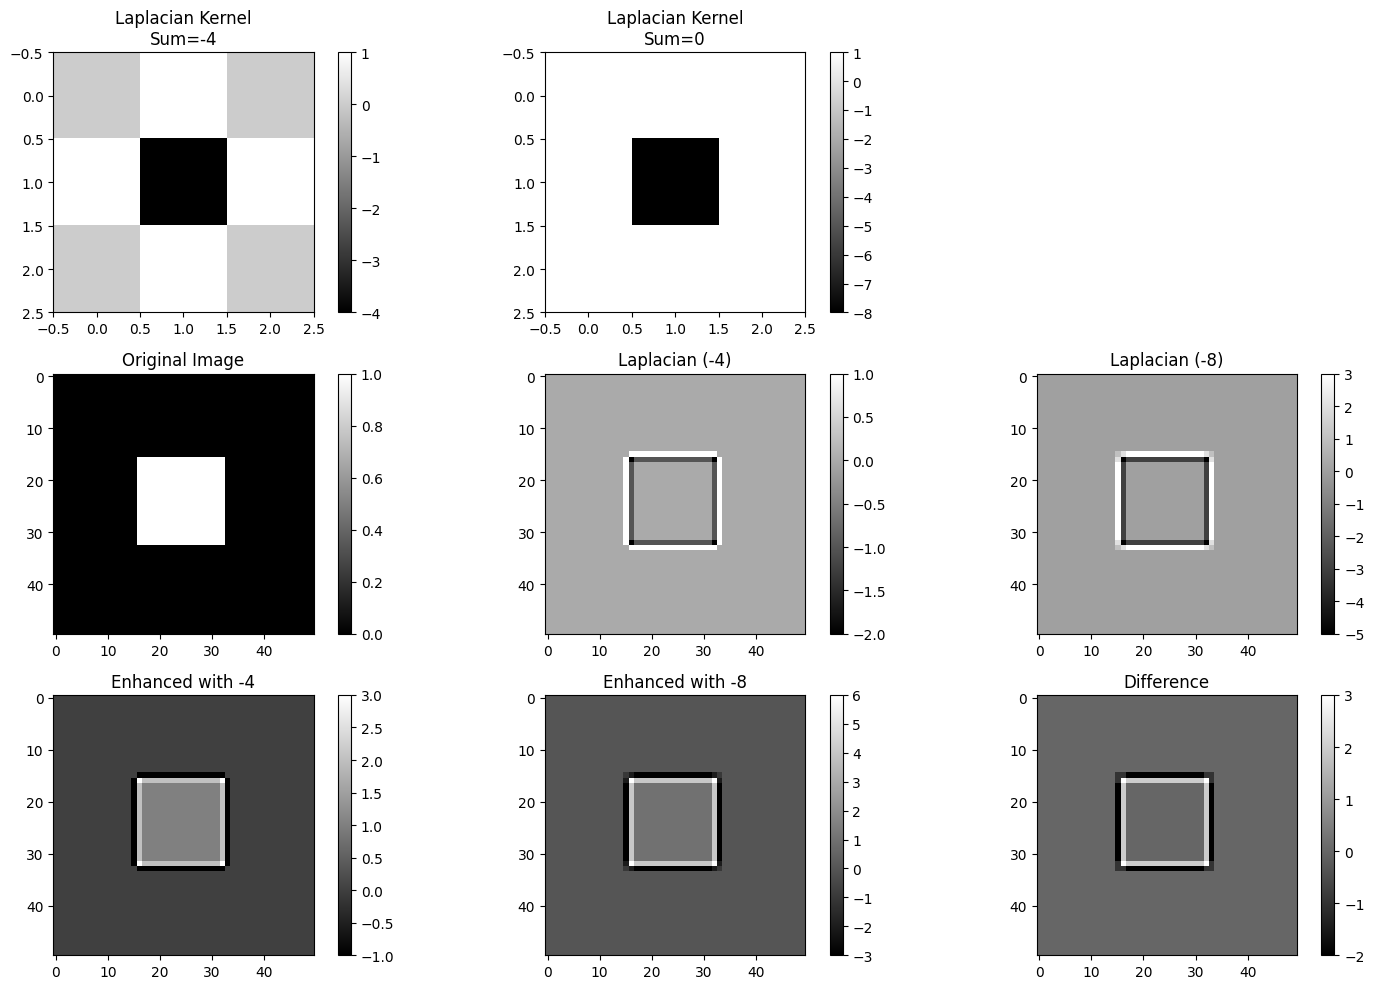

Analysis of Laplacian Filters:

Laplacian with -4:
Sum of kernel: 0
Range of response: [-2.00, 1.00]

Laplacian with -8:
Sum of kernel: 0
Range of response: [-5.00, 3.00]

Response to different patterns:

Pattern 1:
Response with -4 kernel: -4
Response with -8 kernel: -8

Pattern 2:
Response with -4 kernel: -3
Response with -8 kernel: -7

Pattern 3:
Response with -4 kernel: -2
Response with -8 kernel: -6


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create correct Laplacian kernels
lap_4 = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])

lap_8 = np.array([[1, 1, 1],
                  [1, -8, 1],
                  [1, 1, 1]])

def apply_filter(image, kernel):
    """Apply 2D filter using convolution"""
    result = np.zeros_like(image)
    padded = np.pad(image, 1, mode='edge')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.sum(padded[i:i+3, j:j+3] * kernel)

    return result

# Create test image with edges
def create_test_image(size=50):
    img = np.zeros((size, size))
    img[size//3:2*size//3, size//3:2*size//3] = 1.0
    return img

# Create and process image
img = create_test_image()
lap_4_result = apply_filter(img, lap_4)
lap_8_result = apply_filter(img, lap_8)

# Create enhanced images
enhanced_4 = img - lap_4_result
enhanced_8 = img - lap_8_result

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(331)
plt.imshow(lap_4, cmap='gray')
plt.title('Laplacian Kernel\nSum=-4')
plt.colorbar()

plt.subplot(332)
plt.imshow(lap_8, cmap='gray')
plt.title('Laplacian Kernel\nSum=0')
plt.colorbar()

plt.subplot(334)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(335)
plt.imshow(lap_4_result, cmap='gray')
plt.title('Laplacian (-4)')
plt.colorbar()

plt.subplot(336)
plt.imshow(lap_8_result, cmap='gray')
plt.title('Laplacian (-8)')
plt.colorbar()

plt.subplot(337)
plt.imshow(enhanced_4, cmap='gray')
plt.title('Enhanced with -4')
plt.colorbar()

plt.subplot(338)
plt.imshow(enhanced_8, cmap='gray')
plt.title('Enhanced with -8')
plt.colorbar()

plt.subplot(339)
plt.imshow(enhanced_8 - enhanced_4, cmap='gray')
plt.title('Difference')
plt.colorbar()

plt.tight_layout()
plt.show()

# Print analysis
print("Analysis of Laplacian Filters:")
print("\nLaplacian with -4:")
print(f"Sum of kernel: {np.sum(lap_4)}")
print(f"Range of response: [{np.min(lap_4_result):.2f}, {np.max(lap_4_result):.2f}]")

print("\nLaplacian with -8:")
print(f"Sum of kernel: {np.sum(lap_8)}")
print(f"Range of response: [{np.min(lap_8_result):.2f}, {np.max(lap_8_result):.2f}]")

# Show responses for various edge patterns
print("\nResponse to different patterns:")
patterns = [
    np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]]),
    np.array([[0, 0, 0],
              [1, 1, 0],
              [0, 0, 0]]),
    np.array([[0, 0, 0],
              [1, 1, 1],
              [0, 0, 0]])
]

for i, pattern in enumerate(patterns):
    resp_4 = np.sum(pattern * lap_4)
    resp_8 = np.sum(pattern * lap_8)
    print(f"\nPattern {i+1}:")
    print(f"Response with -4 kernel: {resp_4}")
    print(f"Response with -8 kernel: {resp_8}")